#### <font color="asparagus"> $\Rightarrow$ Bike Club Rental Prediction:<br> <font>
$\Rightarrow$ A bike company wants to stand out in the market by coming up with a mindful business plan.
The objective here is to first find the key features/indicators that capture the demand for bike rentals among the population.<br>
$\Rightarrow$ Once identified, the next goal is to build a model(linear regression) that can accurately  the number of bike rentals based on the features in the csv. <br>  $\Rightarrow$ Along the way, EDA is expected and post model building, residual analysis will also be done.

### <font color='cyan'> Sections in this notebook: <font>
I. Prerequisites 
    
    I.1. Importing modules, load data
    I.2. Cache necessary information about the data up front

II. Data understanding
    
    II.1. Addressing each column
        II.1.1. "instant"
        II.1.2.  All date related columns
        II.1.3.  "holiday", "weekday", "workingday"
        II.1.4.  "weathersit"
        II.1.5.  "hum" and "windspeed"
        II.1.6.  "casual" and "registered"
    II.2. Correlation
    II.3. Boxplots and IQR analysis
        II.3.1. Boxplots of numerical columns alone(Univariate analysis)
        II.3.2. Bivariate analysis "cnt" against the categorical columns
    II.4. Train test split
        II.4.1. Target variable: "cnt" 
        II.4.2. Input X
    
III. Standardization 
    
IV. Model building
    
    IV.1. Using sklearn
    IV.2. Using statsmodels
    IV.3. Residual Analysis
        IV.3.1 RFE
        IV.3.2 VIF
    IV.4. Adjust r2_score
    
V. Validating assumptions of Linear Regression 

VI. Conclusion
    
VII. Extras
    
    

# <font color='goldenrod'> I. Prerequisites </font>

### <font color='skyblue'>  I.1. Importing modules, load data<font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

##### *1.1. Load data*

In [2]:
df = pd.read_csv("day.csv")

### <font color='skyblue'>  I.2. Cache necessary information about the data up front

In [3]:
cols = df.columns

In [4]:
cols

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### "cnt" is the target that the linear regression model will predict<br>


In [5]:
nRows, nCols = df.shape

In [6]:
nRows, nCols

(730, 16)

##### Checking for nulls

In [7]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

$\Rightarrow$ <font color="asparagus"> There are no nulls in the data </font>

In [8]:
df.isna().sum().sum() 

0

# <font color='goldenrod'> II. Data understanding </font>

### <font color='skyblue'>  II.1. Addressing each column

#### II.1.1.  "instant"  <br>

$\Rightarrow$ <font color="asparagus"> Saving the ids in a separate variable, it is not a feature </font>

In [9]:
ids = df.instant.to_numpy()

In [10]:
cols_to_drop = []

In [11]:
cols_to_drop.append("instant")

#### II.1.2.  All date related columns: 
"dteday", "season", "yr", "mnth"<br>

"dteday"
$\Rightarrow$ <font color="asparagus"> We do not need to keep dteday as a column, since season, year and month is already captured in other columns. We will drop "dteday" as our aim should be to keep linearly indepdent columns and remove highly correlated columns </font>

In [12]:
cols_to_drop.append("dteday")

"season"
$\Rightarrow$ <font color="asparagus"> The value of season is [1, 2, 3, 4]. But we know that there is no order among them. Plus, when we build a linear model, we do not want 4 to have more weightage when we do w.T.dot(x) <br> $\Rightarrow$ We will one hot encode it. </font>

"season"

In [13]:
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

$\Rightarrow$ <font color="asparagus"> You can use sklearn's OneHotEncoder or pandas' get_dummies. If OneHotEncoder is used, we would need to resize df.season to a 2D array before calling fit()

In [14]:
 df_season= pd.get_dummies(df.season, prefix="season", drop_first=True)

In [15]:
df_season.head()

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [16]:
df = pd.merge(left=df, right=df_season, left_index=True, right_index=True)

In [17]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [18]:
# We can drop season now
cols_to_drop.append("season")

In [19]:
cols_to_drop

['instant', 'dteday', 'season']

"yr"

$\Rightarrow$ <font color="asparagus"> Let's leave this for now. According to the data dictionary, 0: 2018 and 1: 2019

In [20]:
df.yr.unique()

array([0, 1], dtype=int64)

"mnth"

$\Rightarrow$ <font color="asparagus"> There is no order here i.e. December is not greater than January. We can one hot encode it 

In [21]:
df_month= pd.get_dummies(df.mnth, prefix="month", drop_first=True)

In [22]:
df = pd.merge(left=df, right=df_month, left_index=True, right_index=True)

In [23]:
cols_to_drop.append("mnth")

#### II.1.3.  "holiday", "weekday", "workingday"
$\Rightarrow$ <font color="asparagus"> We know that if it is a holiday, it is not a working day : ) Only one column is needed and the other can be dropped. </font>

In [24]:
cols_to_drop.append("holiday")

$\Rightarrow$ <font color="asparagus"> Will study the correlation and accordingly remove the columns as needed

#### II.1.4.  "weathersit"
         1: Clear, Few clouds, Partly cloudy, Partly cloudy
		 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain+Scattered clouds
		 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

$\Rightarrow$ <font color="asparagus"> One Hot encoding it

In [25]:
df.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [26]:
 df_weathersit= pd.get_dummies(df.weathersit, prefix="weathersit", drop_first=True)

In [27]:
df = pd.merge(left=df, right=df_weathersit, left_index=True, right_index=True)

In [28]:
cols_to_drop.append("weathersit") # We can drop weathersit now

In [29]:
cols_to_drop

['instant', 'dteday', 'season', 'mnth', 'holiday', 'weathersit']

#### II.1.4.  "temp" and "atemp"


$\Rightarrow$ <font color="asparagus"> We can drop one of the columns, most likely. "Feels like" seems to be redundant. Heatmap will tell us this

In [30]:
df.temp.nunique()

498

#### II.1.5.  "hum" and "windspeed"

In [31]:
df.windspeed.nunique()

649

In [32]:
df.hum.nunique()

594

#### II.1.6.  "casual" and "registered"


$\Rightarrow$ The sum of "casual" and "registered" will equal "cnt". They are not features either. We can drop them.

In [33]:
cols_to_drop.extend(["casual", "registered"])

Dropping the columns accumulated so far

In [34]:
cols_to_drop

['instant',
 'dteday',
 'season',
 'mnth',
 'holiday',
 'weathersit',
 'casual',
 'registered']

In [35]:
df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   weekday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  month_2       730 non-null    uint8  
 12  month_3       730 non-null    uint8  
 13  month_4       730 non-null    uint8  
 14  month_5       730 non-null    uint8  
 15  month_6       730 non-null    uint8  
 16  month_7       730 non-null    uint8  
 17  month_8       730 non-null    uint8  
 18  month_9       730 non-null    

### <font color='skyblue'>  II.2. Correlation<font>

#### <font color="asparagus"> *Need to create a heatmap of all the retained numeric variables and check the relationship* <font>

In [37]:
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

In [38]:
df.head()

,yr,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weathersit_2,weathersit_3
0,0,6,0,14.11,18.18,80.58,10.75,985,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.90,17.69,69.61,16.65,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,8.05,9.47,43.73,16.64,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,8.20,10.61,59.04,10.74,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,9.31,11.46,43.70,12.52,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


#### <font color="asparagus"> Segregating the columns into continuous and categorical: <font> <br> 
Any column with more than 10 unique values is a continuous variable 

In [39]:
cont_cols = [col for col in df.columns if df[col].nunique() > 10]

In [40]:
cont_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [41]:
cat_cols = [col for col in df.columns if col not in cont_cols]

In [42]:
cat_cols

['yr',
 'weekday',
 'workingday',
 'season_2',
 'season_3',
 'season_4',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'weathersit_2',
 'weathersit_3']

In [43]:
df_numeric = df[cont_cols]

In [44]:
corr_mat = df_numeric.corr()

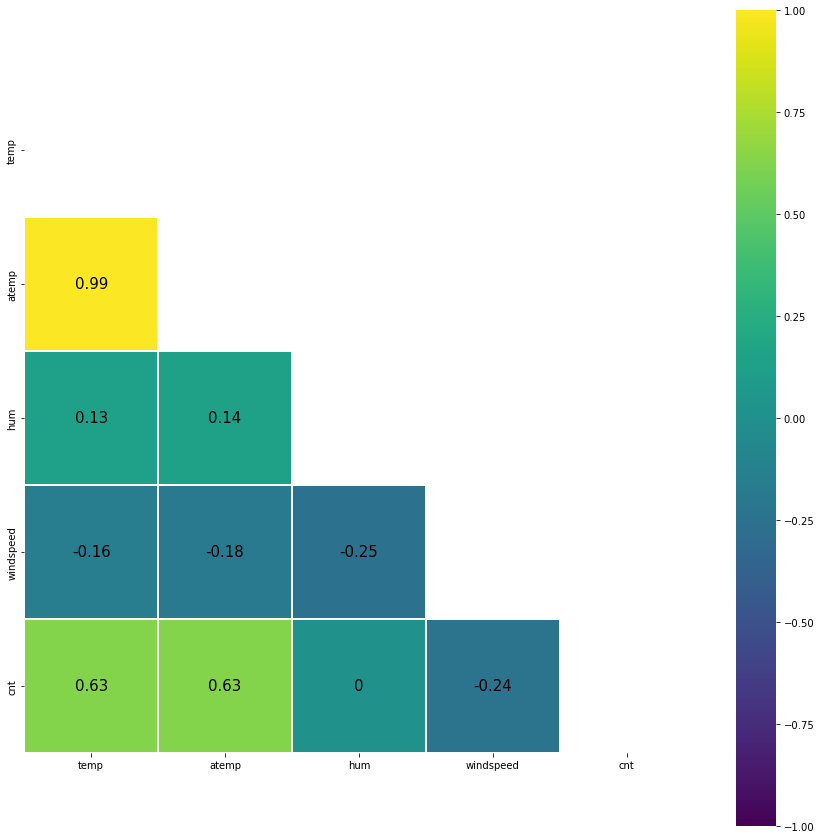

<Figure size 432x288 with 0 Axes>

In [45]:
# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
# Choose the color map
cmap = "viridis"

corr_mat[(corr_mat < 0.1) & (corr_mat > -0.1)] = 0 # Easier to view, don't really care obout weak correlations
# plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 15, "color": "black"}, square=True, cmap=cmap, annot=True)
plt.show()
plt.tight_layout()

##### Strengh of relationship

* |r| < 0.3 $\Rightarrow$ None or Very Weak
* 0.3 < |r| < 0.5 $\Rightarrow$ Weak
* 0.5 < |r| < 0.7 $\Rightarrow$ Moderate
* |r| > 0.7 $\Rightarrow$ Strong

$\Rightarrow$ <font color="asparagus"> As suspected, "atemp" is pointless to keep, we can drop that.<br>
$\Rightarrow$ The other indepedent variables do not have strong correlations. We don't have to disard any of the others. </font>


In [46]:
df.drop("atemp", axis=1, inplace=True)

### <font color='skyblue'>  II.3. Boxplots and IQR analysis <font>

In [47]:
cont_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [48]:
cont_cols.remove("atemp")

In [49]:
cont_cols

['temp', 'hum', 'windspeed', 'cnt']

In [50]:
df_numeric.drop("atemp", axis=1, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
df_numeric.columns

Index(['temp', 'hum', 'windspeed', 'cnt'], dtype='object')

#### II.3.1. Boxplots of numerical columns alone(Univariate analysis)

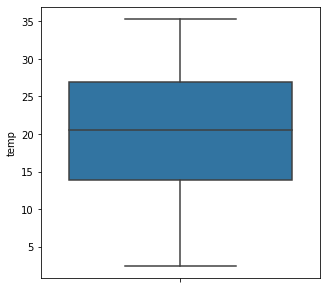

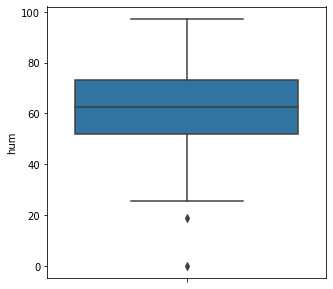

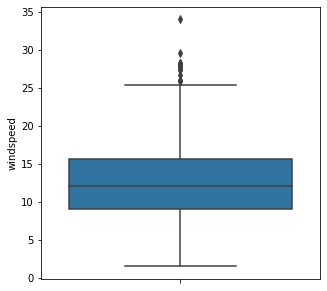

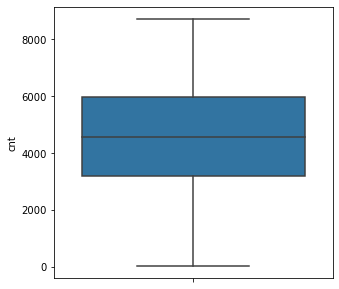

In [52]:
for col in df_numeric.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(y=col,
                data=df_numeric)
    plt.show()

$\Rightarrow$ <font color="asparagus"> The above plot suggests that there are some outliers in the data, but since the data is quite small (number of rows = 730), it may not be wise to drop them.<br> </font>
$\Rightarrow$ <font color="asparagus">We will save the row indexes of the top 1% and bottom 1% of every column in two separate dictionaries though </font>

$\Rightarrow$ <font color="asparagus"> Saving 1% 25%, 50%, 75% and 99% information of every column in a dictionary. </font>

In [53]:
column_quantile_info ={}
for col in df_numeric.columns:
    Q1 = np.quantile(df[col], 0.25)
    Q2 = np.quantile(df[col], 0.5)
    Q3 = np.quantile(df[col], 0.75)
    Q4 = np.quantile(df[col], 0.99)
    Q5 = np.quantile(df[col], 0.01)
    IQR = Q3 - Q1
    column_quantile_info[col] = [Q1, Q2, Q3, IQR, Q3 + 1.5*IQR, Q1 - 1.5*IQR, Q4, Q5]

#### Top 1%

In [54]:
upper_outlier_in_every_column = {}

In [55]:
for col in df_numeric.columns:
    upper_outlier_in_every_column[col] = (np.where(df[col] > column_quantile_info[col][6]))

In [56]:
upper_outlier_in_every_column

{'temp': (array([202, 203, 204, 209, 544, 550, 551, 552], dtype=int64),),
 'hum': (array([ 35,  64, 250, 265, 319, 325, 339, 340], dtype=int64),),
 'windspeed': (array([ 44,  49, 292, 382, 407, 420, 431, 432], dtype=int64),),
 'cnt': (array([446, 503, 570, 616, 622, 628, 629, 636], dtype=int64),)}

In [57]:
upper_rows_to_drop = []

In [58]:
for col in df_numeric.columns:
    if len(upper_outlier_in_every_column[col][0]) > 0:
        upper_rows_to_drop.extend(upper_outlier_in_every_column[col][0])

In [59]:
upper_rows_to_drop = list(set(upper_rows_to_drop))

In [60]:
len(upper_rows_to_drop)

32

#### Bottom 1%

In [61]:
lower_outlier_in_every_column = {}
for col in df_numeric.columns:
    lower_outlier_in_every_column[col] = np.where(df[col] < column_quantile_info[col][7])

In [62]:
lower_rows_to_drop = []
for col in df_numeric.columns:
    if len(lower_outlier_in_every_column[col][0]) > 0:
        lower_rows_to_drop.extend(lower_outlier_in_every_column[col][0])

In [63]:
len(lower_rows_to_drop), len(upper_rows_to_drop)

(32, 32)

$\Rightarrow$ <font color="asparagus"> There are 3 entries which are common between the two outliers. 

In [64]:
list(set(lower_rows_to_drop).intersection(upper_rows_to_drop))

[64, 49, 407]

In [65]:
common_rows = list(set(lower_rows_to_drop).intersection(upper_rows_to_drop))

#### II.3.2. Bivariate analysis "cnt" against the categorical columns

In [66]:
df_orig = pd.read_csv("day.csv")

In [67]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


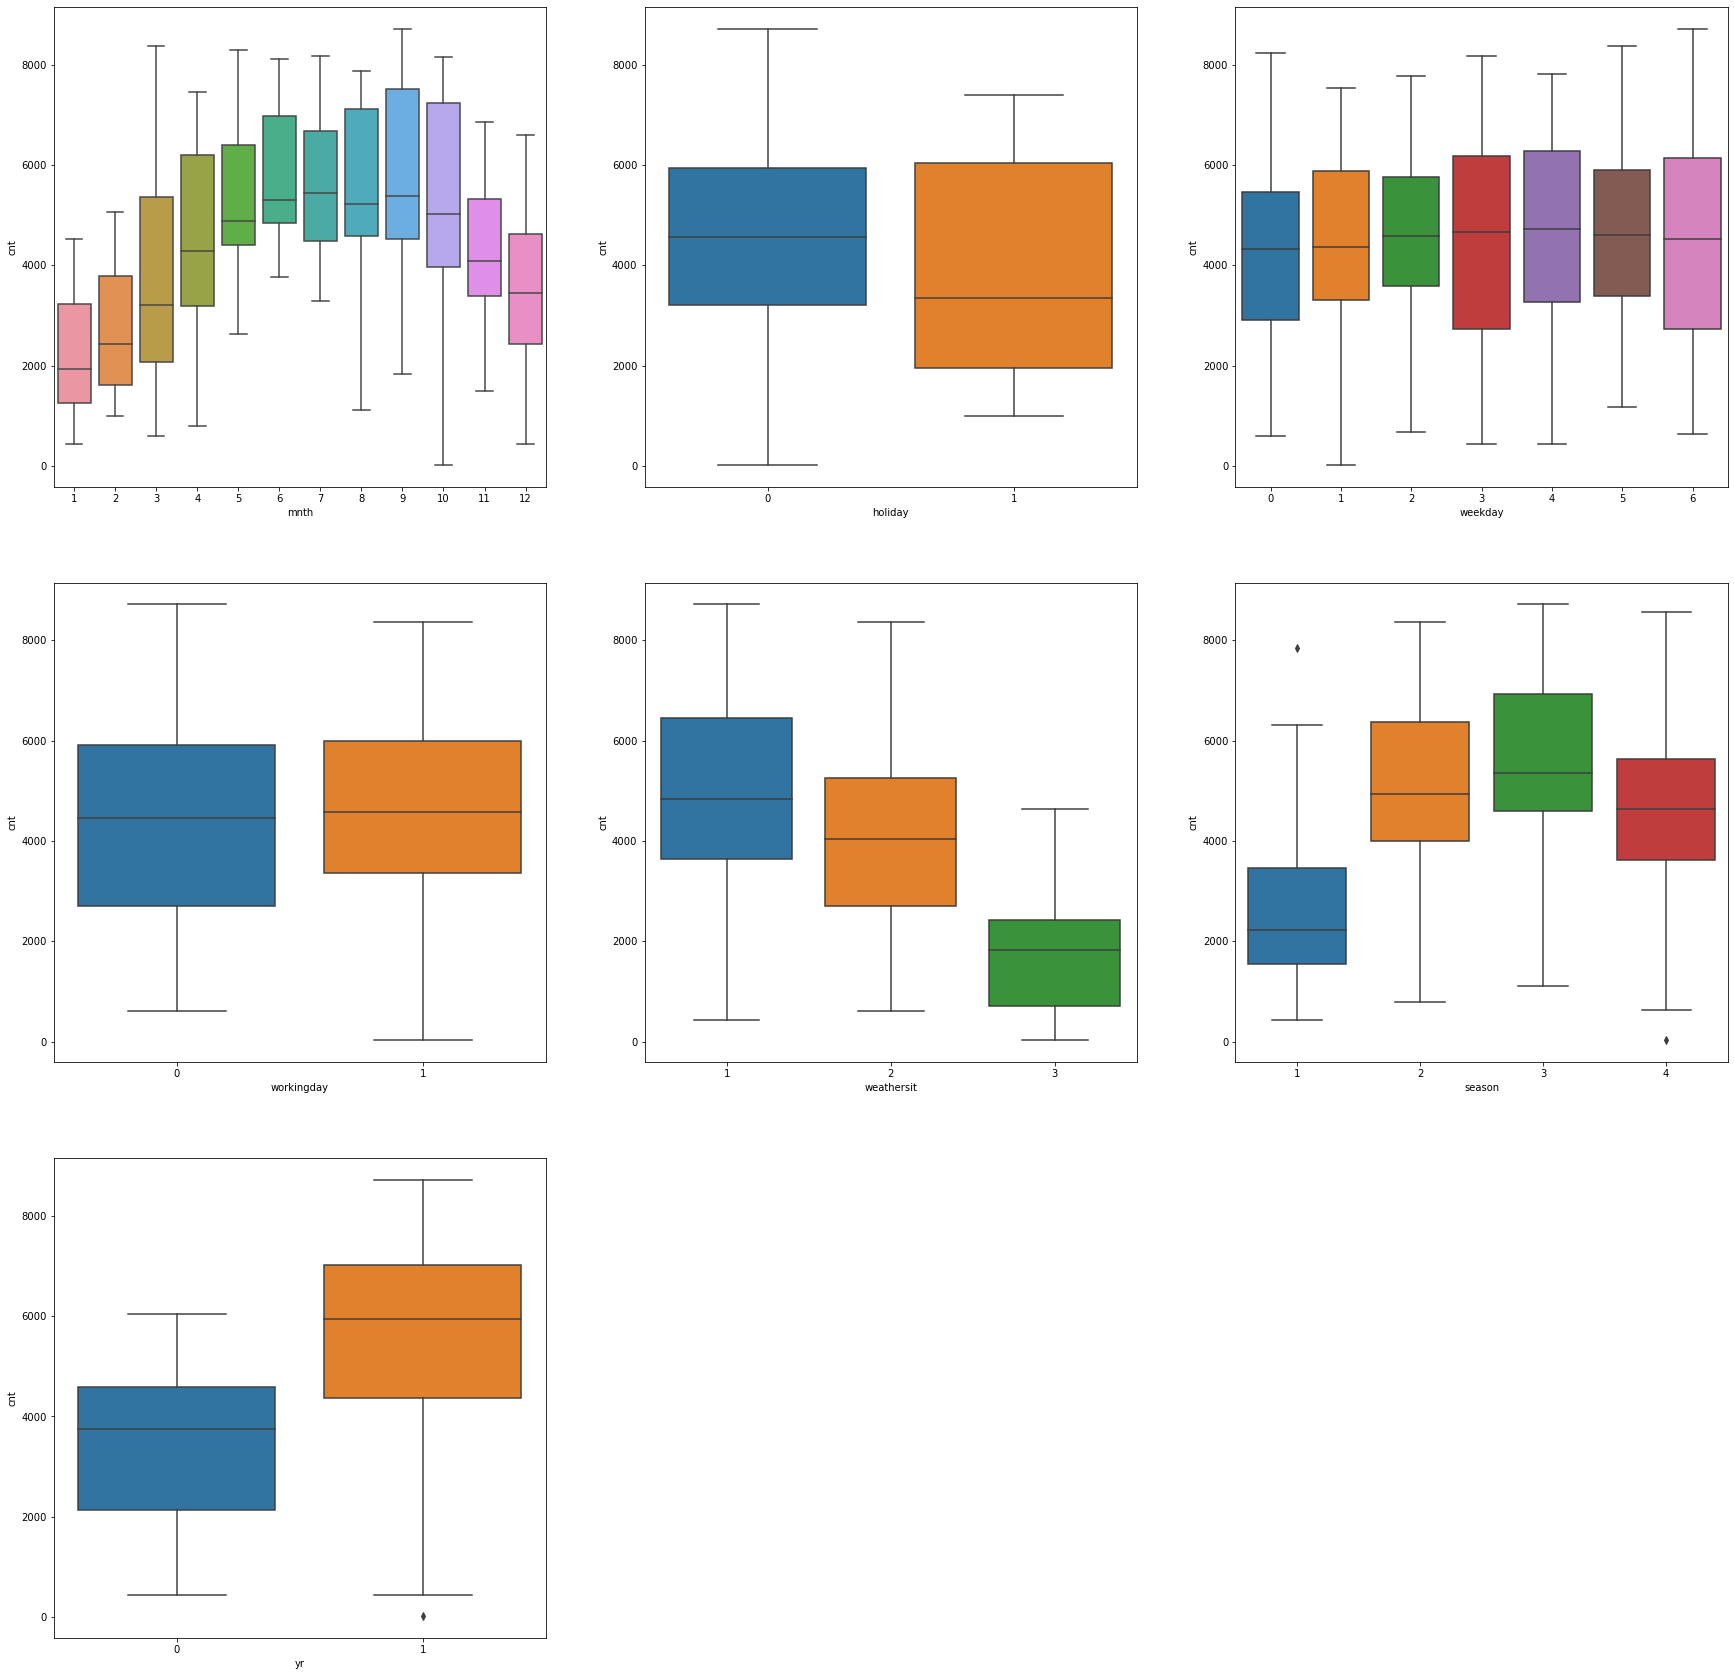

In [68]:
biv_cols = ["mnth", "holiday", "weekday", "workingday", "weathersit", "season", "yr"]
plt.figure(figsize=(30,30))
for idx, col in enumerate(biv_cols):
    plt.subplot(3,3,(idx+1))
    sns.boxplot(x=col, y="cnt",
                data=df_orig)
plt.show()

#### <font color="asparagus"> *Observations and Comments*:</font> 
$\Rightarrow$ <font color="asparagus"> "mnth" <br> - It can be seen that the months, January, February and March see the lowest sales. <br>- April onwards the sales start to pick up, with the peak in the months of June to October. <br>-Sales start dipping from November again. <br> $\Rightarrow$ "holiday"<br> - As expected, there are more sales on a holiday.<br> $\Rightarrow$ "weekday":<br> - The sales pretty much remain constant with some lows in the middle of the week. <br>$\Rightarrow$ "workingday"<br> - Sales are pretty much the same. <br>$\Rightarrow$ "weathersit"<br> - If the weather is "Clear, Few clouds, Partly cloudy, Partly cloudy" the sales are more. A bad weather definitely does affect bike rentals <br> $\Rightarrow$ "season"<br> - Summer and Fall see the highest number of rentals, while spring shows the lowest number of rentals. <br> $\Rightarrow$ "yr" <br> - 2019 had more sales, given the COVID situation, proabably. 

### <font color='skyblue'>  II.4. Train test split <font>

In [69]:
np.random.seed(0)

In [70]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

# <font color='goldenrod'>  III. Standardization <font>

$\Rightarrow$ <font color="asparagus"> Using min-max scaler </font>

In [71]:
scaler = StandardScaler()
minMaxScaler = MinMaxScaler()

In [72]:
cont_cols

['temp', 'hum', 'windspeed', 'cnt']

In [73]:
apply_scaling_on = cont_cols.copy()

In [74]:
apply_scaling_on.remove("cnt") # don't scale the target variable, "cnt"

In [75]:
apply_scaling_on

['temp', 'hum', 'windspeed']

In [76]:
df_train[apply_scaling_on] = scaler.fit_transform(df_train[apply_scaling_on])

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [77]:
df_test[apply_scaling_on] = scaler.transform(df_test[apply_scaling_on])

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [78]:
df_train.head()

,yr,weekday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weathersit_2,weathersit_3
653,1,2,1,-0.12,-0.51,-0.12,7534,0,0,1,...,0,0,0,0,0,1,0,0,0,0
576,1,2,1,1.23,0.52,-0.33,7216,0,1,0,...,0,0,1,0,0,0,0,0,0,0
426,1,6,0,-0.42,-0.07,-0.39,4066,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0,-1.29,-1.05,2.02,1796,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,6,0,-0.63,-1.00,-0.78,4220,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
y_train = df_train.pop("cnt")

In [80]:
X_train = df_train

In [81]:
y_test = df_test.pop("cnt")

In [82]:
X_test = df_test

# <font color='goldenrod'> IV. Model building </font>

### <font color="skyblue"> IV.1. Using sklearn </font>

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lm = LinearRegression()

In [85]:
lm.fit(X_train, y_train) # Fit on the training data

LinearRegression()

In [86]:
y_pred = lm.predict(X_test)

In [87]:
from sklearn.metrics import r2_score

In [88]:
r2_score(y_true=y_test,y_pred=y_pred)

0.8280544295926818

### <font color="skyblue"> IV.2. Using statsmodels </font>

In [89]:
X_train_sm = sm.add_constant(X_train) # must add a 1 for each row

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [90]:
sm_lr = sm.OLS(y_train,X_train_sm)

In [91]:
sm_model = sm_lr.fit()

$\Rightarrow$ <font color="asparagus"> Predict on X_test

In [92]:
X_test_sm = sm.add_constant(X_test)
y_test_sm_pred = sm_model.predict(X_test_sm)

$\Rightarrow$ <font color="asparagus"> Let's look at the r2_score of both models.<br> sklearn: y_test_pred,<br>statsmodels: y_test_sm_pred <font>

In [93]:
r2_score(y_true=y_test, y_pred=y_test_sm_pred)

0.8280544295926818

### <font color="skyblue"> IV.3. Residual Analysis </font>

$\Rightarrow$ <font color="asparagus"> statsmodels' summary does reveal that quite a few coeffecients have a high p value. let's do RFE and then retrain model on this reduced feature set

In [94]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.79e-185
Time:                        02:30:08   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     487   BIC:                             8347.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2217.3285    193.207     11.476      0.000    1837.705    2596.952
yr            2023.1545     70.117     28.854      0.000    1885.384    2160.925
weekday         71.9151     17.184      4.185      0.000      38.150     105.680
workingday     192.1011     73.741      2.605      0.009      47.211     336.991
temp           863.4348     90.638      9.526      0.000     685.345    1041.524
hum           -187.5963     48.860     -3.839      0.000    -283.599     -91.593
windspeed     -273.8657     37.983     -7.210      0.000    -348.496    -199.236
season_2       754.1969    205.334      3.673      0.000     350.746    1157.648
season_3       412.9878    261.010      1.582      0.114     -99.857     925.833
season_4      1384.1758    225.158      6.148      0.000     941.776    1826.576
month_2        260.9859    179.203      1.456      0.146     -91.121     613.093
month_3        592.9164    194.073      3.055      0.002     211.592     974.241
month_4        583.1841    291.702      1.999      0.046      10.034    1156.334
month_5        810.8176    313.765      2.584      0.010     194.317    1427.319
month_6        601.6891    338.154      1.779      0.076     -62.732    1266.110
month_7        279.0946    381.448      0.732      0.465    -470.392    1028.581
month_8        746.5352    362.844      2.057      0.040      33.603    1459.467
month_9       1277.0447    325.940      3.918      0.000     636.622    1917.468
month_10       604.6608    299.734      2.017      0.044      15.729    1193.593
month_11       122.2184    284.922      0.429      0.668    -437.609     682.046
month_12       136.3475    230.641      0.591      0.555    -316.827     589.522
weathersit_2  -526.7888     90.752     -5.805      0.000    -705.103    -348.474
weathersit_3 -2212.5094    228.410     -9.687      0.000   -2661.300   -1763.719
==============================================================================
Omnibus:                       93.864   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.571
Skew:                          -0.859   Prob(JB):                     3.59e-63
Kurtosis:                       6.253   Cond. No.                         95.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\Rightarrow$ <font color="asparagus"> Some columns have a higher p value. There could be linearly dependent columns. Let's do a first pass of RFE, followed by some VIF analysis. </font>

### <font color='skyblue'>  IV.3.1. RFE </font>

In [95]:
len(X_train.columns)

22

In [96]:
rfe = RFE(lm, 15) 

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [97]:
rfe = rfe.fit(X_train, y_train)

In [98]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('weekday', False, 8),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('month_2', False, 4),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', False, 5),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 7),
 ('month_12', False, 6),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [99]:
cols_to_keep = X_train.columns[rfe.support_]

In [100]:
cols_to_keep

Index(['yr', 'temp', 'windspeed', 'season_2', 'season_3', 'season_4',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_8', 'month_9',
       'month_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [101]:
rfe_discarded = X_train.columns[~rfe.support_]

In [102]:
rfe_discarded

Index(['weekday', 'workingday', 'hum', 'month_2', 'month_7', 'month_11',
       'month_12'],
      dtype='object')

In [103]:
X_train_rfe = X_train[cols_to_keep]

In [104]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [105]:
sm_lr =  sm.OLS(y_train, X_train_rfe_sm)

In [106]:
sm_model = sm_lr.fit()

In [107]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.59e-183
Time:                        02:30:08   Log-Likelihood:                -4125.1
No. Observations:                 510   AIC:                             8282.
Df Residuals:                     494   BIC:                             8350.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2751.4034    127.176     21.635      0.000    2501.530    3001.277
yr            2041.6294     71.997     28.357      0.000    1900.171    2183.088
temp           836.5160     73.148     11.436      0.000     692.797     980.235
windspeed     -228.2445     37.576     -6.074      0.000    -302.073    -154.416
season_2       774.4804    195.573      3.960      0.000     390.223    1158.738
season_3       565.4358    205.719      2.749      0.006     161.244     969.627
season_4      1355.7295    128.354     10.562      0.000    1103.542    1607.917
month_3        516.6499    151.201      3.417      0.001     219.574     813.726
month_4        470.2831    231.095      2.035      0.042      16.234     924.333
month_5        611.9765    235.960      2.594      0.010     148.367    1075.586
month_6        462.6863    202.026      2.290      0.022      65.749     859.623
month_8        508.1330    162.378      3.129      0.002     189.096     827.170
month_9       1012.6633    156.532      6.469      0.000     705.112    1320.214
month_10       400.2927    156.597      2.556      0.011      92.615     707.970
weathersit_2  -706.8362     76.877     -9.194      0.000    -857.882    -555.791
weathersit_3 -2504.9312    216.893    -11.549      0.000   -2931.078   -2078.784
==============================================================================
Omnibus:                       83.694   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.620
Skew:                          -0.806   Prob(JB):                     6.17e-50
Kurtosis:                       5.840   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What is the r2_score after dropping certain columns determined by RFE?

In [108]:
X_test_rfe = X_test[cols_to_keep]

In [109]:
X_test_rfe_sm = sm.add_constant(X_test_rfe)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [110]:
y_test_pred_rfe = sm_model.predict(X_test_rfe_sm)

#### Test r2_score

In [111]:
r2_score(y_true=y_test, y_pred=y_test_pred_rfe)

0.8142615820863173

$\Rightarrow$ <font color="asparagus"> The earlier r2_score was 0.828, it has not dipped much from before, it is 0.814 now

### <font color='skyblue'>  IV.3.2. VIF </font>

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
vif = pd.DataFrame()

In [114]:
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_2,6.81
4,season_3,3.83
8,month_5,3.34
7,month_4,3.23
1,temp,2.29
9,month_6,2.12
10,month_8,2.00
5,season_4,1.99
0,yr,1.83
12,month_10,1.63


#### <font color="asparagus"> *Observations and Comments*: <br> $\Rightarrow$ season_2 has a VIF of 6.81. Besides that, none of the VIFs are greater than 5, indicating that the columns are pretty much linearly independent of each other. <br> </font>
<font color="asparagus"> $\Rightarrow$ I do not think dropping season_2 is a good idea, because from our bivariate analysis season_2 and season_3 had the highest number of bike rentals. But let's do it anyway as it seems like there is multicollinearity because of this column. Let's see the impact on the r2_score. </font> 

In [115]:
df.drop("season_2", axis=1, inplace=True)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [116]:
df_train[apply_scaling_on] = scaler.fit_transform(df_train[apply_scaling_on])
df_test[apply_scaling_on] = scaler.transform(df_test[apply_scaling_on])
y_train = df_train.pop("cnt")
y_test = df_test.pop("cnt")
X_train = df_train
X_test = df_test
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15) 
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
cols_to_keep = X_train.columns[rfe.support_]
rfe_discarded = X_train.columns[~rfe.support_]
X_train_rfe = X_train[cols_to_keep]
X_train_rfe_sm = sm.add_constant(X_train_rfe)
sm_lr = sm.OLS(y_train, X_train_rfe_sm)
sm_model = sm_lr.fit()
sm_model_cache = sm_model

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass 

#### Checking VIFs after this

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.07
2,season_4,2.41
0,yr,1.91
11,month_10,1.82
9,month_8,1.72
8,month_7,1.66
13,weathersit_2,1.57
12,month_12,1.43
7,month_6,1.40
10,month_9,1.37


#### <font color="asparagus"> *Observations and Comments*:</font> 
$\Rightarrow$ <font color="asparagus"> We can see that now none of the columns have a VIF > 5, indicating that all columns are linearly independent of each other now </font>

### <font color='skyblue'>  IV.4. Adjusted r2_score </font>

$\Rightarrow$ <font color="asparagus"> Adj r2_score can be calculated by the formula: 1-(1-R2)*(n-1)/(n-p-1), where n is the sample size and p is the number of independent variables </font>

#### Adjusted r2_score on Test data

In [118]:
X_test_rfe = X_test[cols_to_keep]

In [119]:
X_test_rfe_sm = sm.add_constant(X_test_rfe)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [120]:
y_test_pred_rfe = sm_model.predict(X_test_rfe_sm)

In [121]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred_rfe)

#### Test r2_score

In [122]:
r2

0.8101922132255989

In [123]:
n, p = X_test_rfe.shape

In [124]:
adj_r2 = 1 - (1- r2)*(n-1)/(n-p-1)

In [125]:
adj_r2

0.7961670073063082

#### Adjusted r2_score on Train data

In [126]:
y_rfe_pred_train = sm_model.predict(X_train_rfe_sm)

In [127]:
r2_train = r2_score(y_true=y_train, y_pred=y_rfe_pred_train)

#### Train r2_score

In [128]:
r2_train

0.8205661505205544

In [129]:
adj_r2_train = 1 - (1- r2_train)*(n-1)/(n-p-1)

In [130]:
adj_r2_train

0.8073074916920239

$\Rightarrow$ <font color="asparagus"> I touched on outliers briefly in II.3. Boxplots and IQR analysis section. Let's check the impact on the model performance, if we were to remove just the common rows obtained between the top 1% and bottom 1% </font>

In [131]:
df3 = df.drop(index=common_rows, axis=0)

In [132]:
df3.shape

(727, 22)

In [133]:
df_train, df_test = train_test_split(df3, train_size=0.7, test_size=0.3, random_state=100)
df_train[apply_scaling_on] = scaler.fit_transform(df_train[apply_scaling_on])
df_test[apply_scaling_on] = scaler.transform(df_test[apply_scaling_on])
y_train = df_train.pop("cnt")
y_test = df_test.pop("cnt")
X_train = df_train
X_test = df_test
X_train_sm = sm.add_constant(X_train) # must add a 1 for each row
sm_lr = sm.OLS(y_train,X_train_sm)
sm_model = sm_lr.fit()

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [134]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15) 
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
cols_to_keep = X_train.columns[rfe.support_]
rfe_discarded = X_train.columns[~rfe.support_]
X_train_rfe = X_train[cols_to_keep]
X_train_rfe_sm = sm.add_constant(X_train_rfe)
sm_lr = sm.OLS(y_train, X_train_rfe_sm)
sm_model = sm_lr.fit()

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [135]:
lm.fit(X_train_rfe, y_train)
X_test_rfe = X_test[cols_to_keep]
y_pred_test_rfe = lm.predict(X_test_rfe)

#### <font color="asparagus"> *Observations and Comments*:</font> 
$\Rightarrow$ <font color="asparagus"> The r2_score has improved ever so slightly because of removing those 3 extra rows. It is now 0.817. Adjusted r2 score is 0.803

In [136]:
r2_now = r2_score(y_true=y_test, y_pred=y_pred_test_rfe)

In [137]:
r2_now # Test r2 score

0.8173037651765582

In [138]:
adj_r2_now = 1 - (1- r2_now)*(n-1)/(n-p-1)

In [139]:
adj_r2_now

0.8038040433915749

In [140]:
y_train_pred_now = lm.predict(X_train_rfe)

In [141]:
r2_now = r2_score(y_true=y_train, y_pred=y_train_pred_now)

In [142]:
r2_now

0.8350581628124683

In [143]:
adj_r2_now = 1 - (1- r2_now)*(n-1)/(n-p-1)

In [144]:
adj_r2_now

0.8228703423306309

# <font color='goldenrod'> V. Validating assumptions of Linear Regression  </font>

$\Rightarrow$ <font color="asparagus"> Making sure the following assumptions are satisfied: <br>
    1. Error terms are normally distributed<br>
    2. Linear relationship between input variables(X) and output variable(y)<br>
    3. Multicollinearity

### <font color="skyblue"> 1. Error terms are normally distributed </font>

In [145]:
res = y_train - y_train_pred_now

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

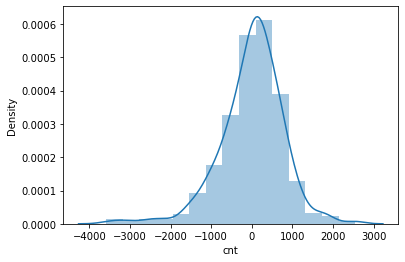

In [146]:
sns.distplot(res, bins=15)

#### <font color="asparagus"> *Observations and Comments*: <br> $\Rightarrow$ The above pdf plot shows that the residual has a normal distribution</font>

### <font color="skyblue"> 2. Linear relationship between input variables(X) and output variable(y) </font>

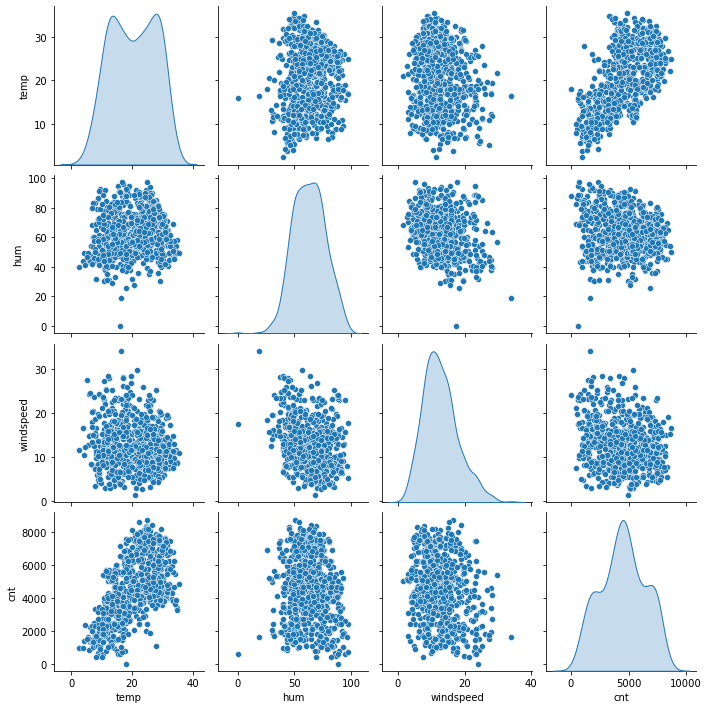

In [147]:
sns.pairplot(df_numeric, diag_kind="kde")
plt.show()

#### <font color="asparagus"> *Observations and Comments*: <br> $\Rightarrow$ Linear relationship exists between "temp" and "cnt", </font>

### <font color="skyblue"> 3. Multicollinearity </font>

In [148]:
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.08
5,weathersit_2,2.55
0,hum,2.11
9,season_4,1.97
10,month_7,1.92
1,yr,1.85
3,month_8,1.76
4,month_10,1.62
7,month_6,1.52
6,month_9,1.42


#### <font color="asparagus"> *Observations and Comments*: <br> $\Rightarrow$ None of the other variables have a VIF > 5, indicating that all columns are linearly independent of each other. </font>

# <font color='goldenrod'> VI. Conclusion </font>

In [149]:
sm_model_cache.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     150.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          3.03e-173
Time:                        02:30:11   Log-Likelihood:                -4149.2
No. Observations:                 510   AIC:                             8330.
Df Residuals:                     494   BIC:                             8398.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2627.9470    168.274     15.617      0.000    2297.326    2958.568
yr            2035.4384     75.504     26.958      0.000    1887.089    2183.787
temp           819.1072     90.268      9.074      0.000     641.751     996.463
season_4      1401.6677    141.705      9.891      0.000    1123.249    1680.086
month_2        130.1697    182.685      0.713      0.476    -228.766     489.105
month_3        806.7108    175.277      4.603      0.000     462.331    1151.090
month_4       1217.2420    198.889      6.120      0.000     826.470    1608.014
month_5       1533.0627    233.747      6.559      0.000    1073.802    1992.324
month_6       1327.9470    273.642      4.853      0.000     790.301    1865.593
month_7        823.9369    299.156      2.754      0.006     236.162    1411.712
month_8       1287.9452    274.368      4.694      0.000     748.873    1827.018
month_9       1667.6999    234.317      7.117      0.000    1207.320    2128.080
month_10       491.3551    183.299      2.681      0.008     131.214     851.496
month_12       106.4059    158.429      0.672      0.502    -204.872     417.684
weathersit_2  -676.0398     80.403     -8.408      0.000    -834.014    -518.065
weathersit_3 -2581.9751    226.082    -11.421      0.000   -3026.177   -2137.773
==============================================================================
Omnibus:                       78.912   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.819
Skew:                          -0.743   Prob(JB):                     9.20e-50
Kurtosis:                       5.902   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
sm_model_cache.params

const           2,627.95
yr              2,035.44
temp              819.11
season_4        1,401.67
month_2           130.17
month_3           806.71
month_4         1,217.24
month_5         1,533.06
month_6         1,327.95
month_7           823.94
month_8         1,287.95
month_9         1,667.70
month_10          491.36
month_12          106.41
weathersit_2     -676.04
weathersit_3   -2,581.98
dtype: float64

#### $\Rightarrow$ <font color="asparagus">  According to the params above, the major impact on the bumber of bike rentals are coming from the following variables: <br> </font>
- weathersit_3: As predicted from our bivariate analysis, a bad weather really seems to impact the sales. -2581.97 is the coefficient associated with it(i.e. if weathersit_3 is 1, keeping everything 0, the number of sales will drop by -2504.93 units) Therefore, the bike rental company can expect less sales in a such a weather. <br> From the data dictionary, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
- yr: The year 2019 has more sales as indicated by the coefficient 2035.43 <br>
- month_9: More weightage is given to September by the linear regression model. Coeff: 1667.7<br>
- month_5: Coeff: 1533.0627
- season_4: According to the linear regression model, season_4 gives more sales. Coeff: 1401.7 <br>
This is followed by some more month variables and then
- temp: Temperature has a good impact on bike rentals too with a coefficient of 819.1 </font>

#### $\Rightarrow$ <font color="asparagus"> On training data, we have the following: </font>
- r2_score: 0.843<br>
- adjusted r2_score: 0.831<br> </font>

#### $\Rightarrow$ <font color="asparagus"> On test data, we have the following:</font>
- r2_score: 0.817<br>
- adjusted r2_score: 0.803<br> </font>

There doesn't seem to be any indication of overfitting as the r2 scores on test and training data are pretty quite close to each other.


# <font color='goldenrod'> VII. Extras </font>

$\Rightarrow$ I touched on outliers briefly in II.3. Boxplots and IQR analysis section. Let's check the impact on the model performance, if we were to remove the outliers. 

In [151]:
lower_rows_to_drop

[8,
 21,
 22,
 23,
 39,
 40,
 368,
 407,
 49,
 68,
 86,
 152,
 393,
 450,
 461,
 462,
 37,
 267,
 279,
 280,
 282,
 355,
 690,
 694,
 17,
 25,
 26,
 64,
 68,
 301,
 666,
 724]

In [152]:
upper_rows_to_drop

[265,
 407,
 544,
 35,
 292,
 420,
 550,
 551,
 552,
 44,
 431,
 432,
 49,
 570,
 446,
 319,
 64,
 325,
 202,
 203,
 204,
 209,
 339,
 340,
 616,
 622,
 628,
 629,
 503,
 250,
 636,
 382]

In [153]:
common_rows

[64, 49, 407]

In [154]:
upper_rows_to_drop.remove(64)

In [155]:
upper_rows_to_drop.remove(49)

In [156]:
upper_rows_to_drop.remove(407)

$\Rightarrow$ <font color="asparagus"> We'd have to discard these rows, split the data and repeat the whole process once more. 

In [157]:
df

,yr,weekday,workingday,temp,hum,windspeed,cnt,season_3,season_4,month_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weathersit_2,weathersit_3
0,0,6,0,14.11,80.58,10.75,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.90,69.61,16.65,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,8.05,43.73,16.64,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,8.20,59.04,10.74,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,9.31,43.70,12.52,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,4,1,10.42,65.29,23.46,2114,0,0,0,...,0,0,0,0,0,0,0,1,1,0
726,1,5,1,10.39,59.00,10.42,3095,0,0,0,...,0,0,0,0,0,0,0,1,1,0
727,1,6,0,10.39,75.29,8.33,1341,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.49,48.33,23.50,1796,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [158]:
upper_rows_to_drop

[265,
 544,
 35,
 292,
 420,
 550,
 551,
 552,
 44,
 431,
 432,
 570,
 446,
 319,
 325,
 202,
 203,
 204,
 209,
 339,
 340,
 616,
 622,
 628,
 629,
 503,
 250,
 636,
 382]

In [159]:
df2 = df.drop(index=upper_rows_to_drop, axis=0)
df2 = df2.drop(index=lower_rows_to_drop, axis=0)

In [160]:
df2.shape

(670, 22)

In [161]:
df_train, df_test = train_test_split(df2, train_size=0.7, test_size=0.3, random_state=100)

In [162]:
df

,yr,weekday,workingday,temp,hum,windspeed,cnt,season_3,season_4,month_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weathersit_2,weathersit_3
0,0,6,0,14.11,80.58,10.75,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.90,69.61,16.65,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,8.05,43.73,16.64,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,8.20,59.04,10.74,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,9.31,43.70,12.52,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,4,1,10.42,65.29,23.46,2114,0,0,0,...,0,0,0,0,0,0,0,1,1,0
726,1,5,1,10.39,59.00,10.42,3095,0,0,0,...,0,0,0,0,0,0,0,1,1,0
727,1,6,0,10.39,75.29,8.33,1341,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.49,48.33,23.50,1796,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [163]:
apply_scaling_on

['temp', 'hum', 'windspeed']

In [164]:
df_train[apply_scaling_on] = scaler.fit_transform(df_train[apply_scaling_on])
df_test[apply_scaling_on] = scaler.transform(df_test[apply_scaling_on])

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [165]:
y_train = df_train.pop("cnt")
y_test = df_test.pop("cnt")

In [166]:
X_train = df_train
X_test = df_test

In [167]:
X_train_sm = sm.add_constant(X_train) # must add a 1 for each row

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [168]:
sm_lr = sm.OLS(y_train,X_train_sm)
sm_model = sm_lr.fit()

In [169]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     139.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          3.96e-181
Time:                        02:30:12   Log-Likelihood:                -3714.1
No. Observations:                 468   AIC:                             7472.
Df Residuals:                     446   BIC:                             7563.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2037.6617    180.616     11.282      0.000    1682.697    2392.626
yr            2050.8135     65.556     31.284      0.000    1921.977    2179.650
weekday         84.3862     16.021      5.267      0.000      52.900     115.872
workingday     194.3907     69.785      2.786      0.006      57.242     331.539
temp           804.6480     88.031      9.140      0.000     631.641     977.656
hum           -216.6551     47.372     -4.574      0.000    -309.754    -123.556
windspeed     -218.8209     35.945     -6.088      0.000    -289.464    -148.178
season_3       377.6213    209.366      1.804      0.072     -33.845     789.088
season_4      1429.2676    192.721      7.416      0.000    1050.513    1808.022
month_2        228.8381    165.319      1.384      0.167     -96.063     553.739
month_3        898.6852    170.392      5.274      0.000     563.814    1233.556
month_4       1341.0069    186.612      7.186      0.000     974.259    1707.755
month_5       1719.8437    227.972      7.544      0.000    1271.812    2167.876
month_6       1458.1003    267.941      5.442      0.000     931.516    1984.684
month_7        783.2589    334.881      2.339      0.020     125.119    1441.399
month_8        838.7932    324.819      2.582      0.010     200.427    1477.160
month_9       1377.3822    285.837      4.819      0.000     815.627    1939.138
month_10       790.3687    269.431      2.933      0.004     260.857    1319.881
month_11        33.2823    248.383      0.134      0.893    -454.863     521.428
month_12        80.4227    203.067      0.396      0.692    -318.665     479.510
weathersit_2  -390.8955     88.679     -4.408      0.000    -565.175    -216.616
weathersit_3 -1761.7759    293.425     -6.004      0.000   -2338.444   -1185.108
==============================================================================
Omnibus:                       56.128   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.127
Skew:                          -0.768   Prob(JB):                     2.69e-20
Kurtosis:                       4.504   Cond. No.                         82.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [171]:
rfe = RFE(lm, 15) 

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [172]:
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
cols_to_keep = X_train.columns[rfe.support_]
rfe_discarded = X_train.columns[~rfe.support_]
X_train_rfe = X_train[cols_to_keep]
X_train_rfe_sm = sm.add_constant(X_train_rfe)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [173]:
cols_to_keep

Index(['yr', 'temp', 'hum', 'season_3', 'season_4', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [174]:
sm_lr = sm.OLS(y_train, X_train_rfe_sm)
sm_model = sm_lr.fit()

In [175]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     162.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          4.16e-171
Time:                        02:30:12   Log-Likelihood:                -3754.2
No. Observations:                 468   AIC:                             7540.
Df Residuals:                     452   BIC:                             7607.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2480.4585    140.969     17.596      0.000    2203.422    2757.495
yr            2067.4785     70.572     29.296      0.000    1928.788    2206.169
temp           806.7214     92.734      8.699      0.000     624.477     988.966
hum           -163.5544     48.425     -3.377      0.001    -258.721     -68.388
season_3       390.6897    209.930      1.861      0.063     -21.870     803.250
season_4      1475.6544    119.382     12.361      0.000    1241.042    1710.267
month_3        759.7307    154.139      4.929      0.000     456.812    1062.650
month_4       1213.4407    170.153      7.131      0.000     879.052    1547.830
month_5       1662.8016    215.891      7.702      0.000    1238.527    2087.076
month_6       1408.4850    252.559      5.577      0.000     912.149    1904.821
month_7        787.4350    309.853      2.541      0.011     178.503    1396.367
month_8        797.1927    300.813      2.650      0.008     206.027    1388.358
month_9       1431.1512    241.337      5.930      0.000     956.869    1905.434
month_10       746.9655    168.940      4.421      0.000     414.960    1078.971
weathersit_2  -435.9364     93.691     -4.653      0.000    -620.061    -251.812
weathersit_3 -2019.9622    309.195     -6.533      0.000   -2627.601   -1412.323
==============================================================================
Omnibus:                       59.951   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.817
Skew:                          -0.810   Prob(JB):                     9.47e-22
Kurtosis:                       4.530   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
vif = pd.DataFrame()

In [177]:
lm.fit(X_train_rfe, y_train)
X_test_rfe = X_test[cols_to_keep]
y_pred_test_rfe = lm.predict(X_test_rfe)

#### The r2_score because of removing outliers drops to 0.795

In [178]:
r2_score(y_true=y_test, y_pred=y_pred_test_rfe)

0.7950050278114559